In [1]:
from keras.preprocessing import sequence  
from keras.models import Sequential  
from keras.datasets import boston_housing  
from keras.layers import Dense, Dropout 
# from keras.utils import multi_gpu_model  
# from tensorflow.python.keras.utils.multi_gpu_utils import multi_gpu_model
from keras import regularizers  # 正则化  
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import MinMaxScaler  
import pandas as pd

In [2]:
(x_train, y_train), (x_valid, y_valid) = boston_housing.load_data()  # 加载数据 
# 转成DataFrame格式方便数据处理
x_train_pd = pd.DataFrame(x_train)  
y_train_pd = pd.DataFrame(y_train)  
x_valid_pd = pd.DataFrame(x_valid)  
y_valid_pd = pd.DataFrame(y_valid)  
print(x_train_pd.head(5)) 
print('-------------------') 
print(y_train_pd.head(5))

        0     1      2    3      4      5      6       7     8      9     10  \
0  1.23247   0.0   8.14  0.0  0.538  6.142   91.7  3.9769   4.0  307.0  21.0   
1  0.02177  82.5   2.03  0.0  0.415  7.610   15.7  6.2700   2.0  348.0  14.7   
2  4.89822   0.0  18.10  0.0  0.631  4.970  100.0  1.3325  24.0  666.0  20.2   
3  0.03961   0.0   5.19  0.0  0.515  6.037   34.5  5.9853   5.0  224.0  20.2   
4  3.69311   0.0  18.10  0.0  0.713  6.376   88.4  2.5671  24.0  666.0  20.2   

       11     12  
0  396.90  18.72  
1  395.38   3.11  
2  375.52   3.26  
3  396.90   8.01  
4  391.43  14.65  
-------------------
      0
0  15.2
1  42.3
2  50.0
3  21.1
4  17.7


In [3]:
# 训练集归一化  
min_max_scaler = MinMaxScaler()  
min_max_scaler.fit(x_train_pd)  
x_train = min_max_scaler.transform(x_train_pd)  

min_max_scaler.fit(y_train_pd)  
y_train = min_max_scaler.transform(y_train_pd)  
  
# 验证集归一化  
min_max_scaler.fit(x_valid_pd)  
x_valid = min_max_scaler.transform(x_valid_pd)  

min_max_scaler.fit(y_valid_pd)  
y_valid = min_max_scaler.transform(y_valid_pd)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [5]:
# 单CPU or GPU版本，若有GPU则自动切换  
model = Sequential()  # 初始化，很重要！
model.add(Dense(units = 10,   # 输出大小  
                activation='relu',  # 激励函数  
                input_shape=(x_train_pd.shape[1],)  # 输入大小, 也就是列的大小  
                )
         )  

model.add(Dropout(0.2))  # 丢弃神经元链接概率  

model.add(Dense(units = 15,  
#                 kernel_regularizer=regularizers.l2(0.01),  # 施加在权重上的正则项  
#                 activity_regularizer=regularizers.l1(0.01),  # 施加在输出上的正则项  
                 activation='relu' # 激励函数  
                 # bias_regularizer=keras.regularizers.l1_l2(0.01)  # 施加在偏置向量上的正则项  
                )  
         )  
   
model.add(Dense(units = 1,     
                activation='linear'  # 线性激励函数 回归一般在输出层用这个激励函数  
               )  
         )  
   
print(model.summary())  # 打印网络层次结构  
    
model.compile(loss='mse',  # 损失均方误差 
              optimizer='adam',  # 优化器  
             )  
history = model.fit(x_train, y_train, 
                    epochs=200,  # 迭代次数  
                    batch_size=200,  # 每次用来梯度下降的批处理数据大小  
                    verbose=2,  # verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：输出训练进度，2：输出每一个epoch 
                    validation_data = (x_valid, y_valid)  # 验证集  
                   )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
3/3 - 1s - loss: 0.0788 - val_loss: 0.0469 - 518ms/epoch - 173ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0718 - val_loss: 0.0465 - 20ms/epoch - 7ms/step
Epoch 3/200
3/3 - 0s - l

Epoch 92/200
3/3 - 0s - loss: 0.0282 - val_loss: 0.0285 - 18ms/epoch - 6ms/step
Epoch 93/200
3/3 - 0s - loss: 0.0270 - val_loss: 0.0289 - 18ms/epoch - 6ms/step
Epoch 94/200
3/3 - 0s - loss: 0.0278 - val_loss: 0.0302 - 19ms/epoch - 6ms/step
Epoch 95/200
3/3 - 0s - loss: 0.0256 - val_loss: 0.0318 - 20ms/epoch - 7ms/step
Epoch 96/200
3/3 - 0s - loss: 0.0273 - val_loss: 0.0330 - 18ms/epoch - 6ms/step
Epoch 97/200
3/3 - 0s - loss: 0.0300 - val_loss: 0.0333 - 18ms/epoch - 6ms/step
Epoch 98/200
3/3 - 0s - loss: 0.0271 - val_loss: 0.0326 - 19ms/epoch - 6ms/step
Epoch 99/200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0316 - 19ms/epoch - 6ms/step
Epoch 100/200
3/3 - 0s - loss: 0.0252 - val_loss: 0.0302 - 18ms/epoch - 6ms/step
Epoch 101/200
3/3 - 0s - loss: 0.0252 - val_loss: 0.0283 - 18ms/epoch - 6ms/step
Epoch 102/200
3/3 - 0s - loss: 0.0234 - val_loss: 0.0264 - 19ms/epoch - 6ms/step
Epoch 103/200
3/3 - 0s - loss: 0.0253 - val_loss: 0.0245 - 18ms/epoch - 6ms/step
Epoch 104/200
3/3 - 0s - loss: 0.024

Epoch 194/200
3/3 - 0s - loss: 0.0206 - val_loss: 0.0251 - 19ms/epoch - 6ms/step
Epoch 195/200
3/3 - 0s - loss: 0.0214 - val_loss: 0.0239 - 19ms/epoch - 6ms/step
Epoch 196/200
3/3 - 0s - loss: 0.0209 - val_loss: 0.0234 - 21ms/epoch - 7ms/step
Epoch 197/200
3/3 - 0s - loss: 0.0202 - val_loss: 0.0227 - 19ms/epoch - 6ms/step
Epoch 198/200
3/3 - 0s - loss: 0.0196 - val_loss: 0.0223 - 19ms/epoch - 6ms/step
Epoch 199/200
3/3 - 0s - loss: 0.0204 - val_loss: 0.0217 - 18ms/epoch - 6ms/step
Epoch 200/200
3/3 - 0s - loss: 0.0200 - val_loss: 0.0206 - 19ms/epoch - 6ms/step


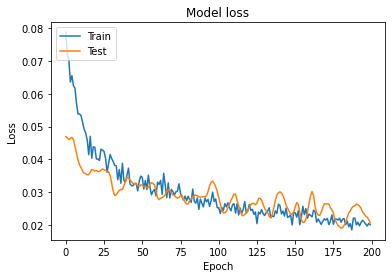

In [6]:
import matplotlib.pyplot as plt  
# 绘制训练 & 验证的损失值  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Test'], loc='upper left')  
plt.show()

In [7]:
from keras.utils import plot_model  
from keras.models import load_model  
# 保存模型  
model.save('model_MLP.h5')  # 生成模型文件 'my_model.h5'  
 
# 模型可视化 需要安装pydot pip install pydot  
plot_model(model, to_file='model_MLP.png', show_shapes=True)  

# 绘制模型
# plot_model(model,to_file='model_MLP.png', show_shapes=True, show_layer_names='False', rankdir='TB') # LR

 
# 加载模型  
model = load_model('model_MLP.h5')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [8]:
# 预测
y_new = model.predict(x_valid)  
# 反归一化还原原始量纲  
min_max_scaler.fit(y_valid_pd) 
y_new = min_max_scaler.inverse_transform(y_new) 

4/4 [==============================] - 0s 665us/step


In [9]:
for i in range(len(y_new)):
    print(y_valid_pd.values[i], y_new[i])

[7.2] [9.502255]
[18.8] [21.109911]
[19.] [19.24987]
[27.] [23.29083]
[22.2] [21.164919]
[24.5] [19.746157]
[31.2] [25.612719]
[22.9] [21.137262]
[20.5] [18.65944]
[23.2] [18.205633]
[18.6] [16.417007]
[14.5] [18.956131]
[17.8] [20.000875]
[50.] [28.713799]
[20.8] [14.060295]
[24.3] [20.175682]
[24.2] [20.937792]
[19.8] [21.262678]
[19.1] [17.676037]
[22.7] [19.81404]
[12.] [11.6525545]
[10.2] [12.120615]
[20.] [19.55982]
[18.5] [18.714396]
[20.9] [23.161665]
[23.] [17.97765]
[27.5] [28.168507]
[30.1] [25.195751]
[9.5] [10.575444]
[22.] [21.178791]
[21.2] [20.51711]
[14.1] [12.031082]
[33.1] [29.364967]
[23.4] [20.62987]
[20.1] [13.055455]
[7.4] [9.774871]
[15.4] [13.100236]
[23.8] [16.331762]
[20.1] [20.054686]
[24.5] [25.940554]
[33.] [23.555542]
[28.4] [22.566818]
[14.1] [14.27046]
[46.7] [25.09068]
[32.5] [25.816324]
[29.6] [22.226797]
[28.4] [24.482874]
[19.8] [19.641787]
[20.2] [18.280956]
[25.] [19.78545]
[35.4] [27.542292]
[20.3] [19.82983]
[9.7] [12.27404]
[14.5] [19.052042]
[

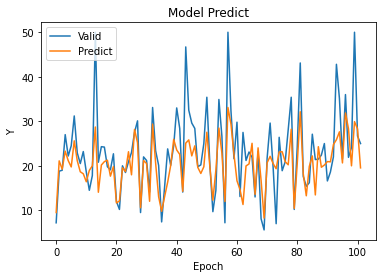

In [10]:
import matplotlib.pyplot as plt  
# 绘制真实&预测  
plt.plot(y_valid_pd.values)  
plt.plot(y_new)  
plt.title('Model Predict')  
plt.ylabel('Y')  
plt.xlabel('Epoch')  
plt.legend(['Valid', 'Predict'], loc='upper left')  
plt.show()